<a href="https://colab.research.google.com/github/halldm2000/NOAA-AI-2020-TUTORIAL/blob/master/1DCurveFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Curve fitting**
- Deep learning is a very powerful technique
- But it is also just a generalization of curve fitting
- Let's try performing a curve fit manually to build up some intuition
- (Note: this works in the Chrome browser, but may not work in other browsers)

### **Download CO$_2$ data**

* Let's download weekly carbon dioxide measurements from Mauna Lau 
* We can use `wget` to get the data from the NOAA website

In [0]:
# download co2 data from website: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html
!wget -q -c -P data/ ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt

# load the data using numpy
import numpy as np
data  = np.loadtxt("./data/co2_weekly_mlo.txt") 

# drop invalid points
valid = data[:,4]>0                               # identify which rows are valid
data  = data[valid,:]                             # remove rows with missing values
year  = data[:,3] - 1974;                         # column 3 is year in decimal format
co2   = data[:,4]                                 # column 4 is co2 in parts per million
print("Number of CO2 obsertvations =",co2.size)

x = year
y = co2

Number of CO2 obsertvations = 2371


### Define plotting routines

In [0]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

def plot(y_pred,loss=-1):

  # plot data
  fig = plt.figure(figsize=(20,10))
  plt.plot(x,y,'o',alpha=0.7,markersize=1)
  plt.grid(True)
  plt.title('Mauna Lua CO$_2$ weekly data')
  plt.title(f'Mauna Lua CO$_2$ weekly data.  Loss={loss:.3f}',fontsize=16) if loss > 0 else None

  plt.ylabel('CO$_2$ parts per million ')
  plt.xlabel('Years since 1974')

  # plot prediction
  plt.plot(x, y_pred,'.', markersize=1)
  fig.show()

mslider = widgets.FloatSlider(min=0  ,max=3  ,step=0.01, continuous_update = False)
bslider = widgets.FloatSlider(min=320,max=360,step=0.10,continuous_update = False)s

### **Find the trend line, manually**

Try to fit a straight trend line to the data by manually adjusting the slope and y intercept of the line.

In [0]:
%matplotlib inline
def fit(m,b): plot(m*x + b)

iplot = widgets.interactive(fit, m=mslider, b=bslider)
iplot.children[-1].layout.height='800px'
iplot

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='m', max=3.0, step=0.01), Fl…

* Define loss function. Add loss value to the plot.
* Try to minimize the loss
* Gradient tells you which parameters to adjust and how much
* Plot loss as a function of m and b
* See how loss function changes due to choice of criterion, data points, etc



### **Add a loss function**

We figure our how close our fit is to the right answer by computing a loss function

In [0]:
from numpy import sum, abs

def fit_with_loss(m,b):

  y_pred = m*x + b
  loss = sum( abs(y_pred-y) / y.size )
  plot(y_pred,loss)

iplot = widgets.interactive(fit_with_loss, m=mslider, b=bslider)
iplot.children[-1].layout.height='800px'
iplot

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='m', max=3.0, step=0.01), Fl…

<function numpy.sum>

### Plot loss as a function of m and b

m=1.80 b=325.00 loss=2.56


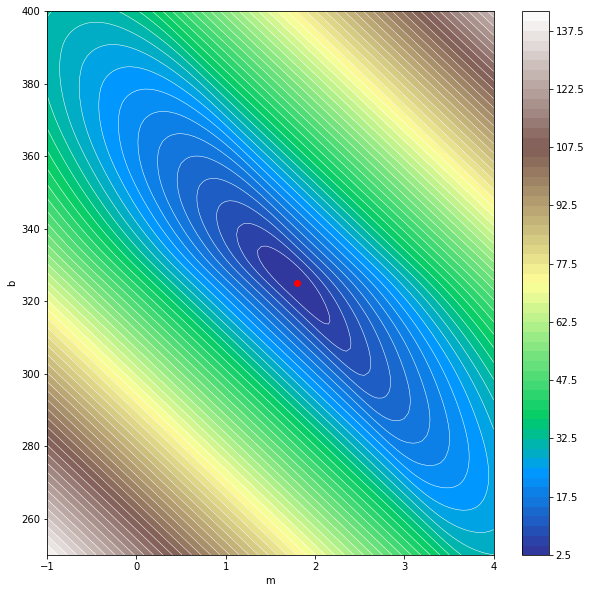

In [0]:
def loss(m,b):
  y_pred = m*x + b
  L = 1
  loss = sum( abs(y_pred-y)**L / y.size )**(1/L)
  return loss

# compute losses at each point on a grid
N = 101
mrange = np.linspace(-1  ,4  , N)
brange = np.linspace(250,400, N)
losses = np.array([[loss(m,b) for m in mrange] for b in brange])

# find smallest loss on the grid
bi,mi = np.unravel_index(np.argmin(losses),losses.shape)
mmin = mrange[mi]
bmin = brange[bi]
lmin = np.min(losses)
print(f"m={mmin:.2f} b={bmin:.2f} loss={lmin:.2f}")

# plot loss surface using filled contours and mark minimum point
plt.figure(figsize=(10,10))
plt.contour(mrange,brange,losses,colors='w',levels=60,linewidths=0.5)
plt.contourf(mrange,brange,losses,levels=60,cmap='terrain')
plt.xlabel('m'); plt.ylabel('b')
plt.colorbar()
plt.scatter(mmin,bmin,color='r');